In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

37.41815282779801 7.364423889884364
30.184299083964035 169.36605653646808
-24.477465305870055 -166.23390303926016
-67.94990194477057 -153.48757738011278
44.358996192038205 95.0452619095712
-72.85439158312298 11.802133719370516
-12.472112113708803 72.8601369282932
12.329040038878503 159.7021357730319
58.099537530012356 154.19823340680432
-31.228417801477676 127.4666857722649
-18.967619868369383 25.506280522626753
62.75501371018834 -56.62710435881982
-42.825341905381485 -175.42671866349056
80.53565776385332 77.40125928085632
52.50101390578595 26.47487146131178
-35.666798275836314 -161.66020024093478
-43.37341328347707 176.59742724609492
-80.01521615158345 35.227772578931365
45.34225314913647 -23.1646815046511
-37.332681638656226 178.92370716365997
42.45039788435065 151.26619813628662
-54.571903256117075 -60.254826789109984
5.997253632741703 157.58988104948895
-19.237675191228277 -155.11343830807675
-22.718333506736272 -34.010170994494786
-45.31558798157679 58.732257576639256
1.0207094795

30.433585588605297 139.45678233165756
12.243841599000405 34.52130221696763
13.017592261168687 -112.81129944298469
-54.39740959417713 48.97064230123044
-46.05589366915104 -97.85656623813784
16.523268930447387 -170.66701842180836
-79.88459995388337 -75.6281245961548
-68.50923538303802 130.5994638626471
42.08912477180846 24.20353772036023
-71.74649685992229 -132.60456307310307
-45.228037530350065 -124.65583942141711
80.39055988074404 176.299303421361
-5.919652415420714 124.90398288768625
-41.36273933112669 118.27459695735746
41.519249175717846 -143.08295469466916
73.80716444269376 60.39780756294951
66.16927186847423 53.78824748753493
53.83592533624213 37.39529602468963
2.350927581865278 -122.08804772352656
-43.30164870389858 13.347338314421279
45.02077404237042 -35.405681884826805
-37.343258739432436 -138.97853749984043
86.5773764221504 171.03159126507632
-73.24335018172957 103.64067139256974
-69.66415513970794 -176.68613982273234
-40.886634369773574 92.21766472227586
80.25719217482467 13

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | constantine
Processing Record 2 of Set 13 | severo-kurilsk
Processing Record 3 of Set 13 | alofi
Processing Record 4 of Set 13 | mataura
Processing Record 5 of Set 13 | hami
Processing Record 6 of Set 13 | hermanus
Processing Record 7 of Set 13 | hithadhoo
Processing Record 8 of Set 13 | butaritari
Processing Record 9 of Set 13 | ola
Processing Record 10 of Set 13 | esperance
Processing Record 11 of Set 13 | pandamatenga
Processing Record 12 of Set 13 | maniitsoq
Processing Record 13 of Set 13 | vaini
Processing Record 14 of Set 13 | dikson
Processing Record 15 of Set 13 | pinsk
Processing Record 16 of Set 13 | avarua
Processing Record 17 of Set 13 | waipawa
Processing Record 18 of Set 13 | port elizabeth
Processing Record 19 of Set 13 | praia da vitoria
Processing Record 20 of Set 13 | ruatoria
City not found. Skipping...
Processing Record 21 of Set 13 | sentyabrskiy
City not found. Skipping...

Processing Record 30 of Set 16 | airai
Processing Record 31 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 32 of Set 16 | samusu
City not found. Skipping...
Processing Record 33 of Set 16 | leningradskiy
Processing Record 34 of Set 16 | mergui
City not found. Skipping...
Processing Record 35 of Set 16 | san patricio
Processing Record 36 of Set 16 | port blair
Processing Record 37 of Set 16 | saskylakh
Processing Record 38 of Set 16 | lagos
Processing Record 39 of Set 16 | carnarvon
Processing Record 40 of Set 16 | tumannyy
City not found. Skipping...
Processing Record 41 of Set 16 | babanusah
City not found. Skipping...
Processing Record 42 of Set 16 | monroe
Processing Record 43 of Set 16 | castro
Processing Record 44 of Set 16 | kautokeino
Processing Record 45 of Set 16 | sobolevo
Processing Record 46 of Set 16 | namibe
Processing Record 47 of Set 16 | londoko
Processing Record 48 of Set 16 | bogen
Processing Record 49 of Set 16 | shahr-e babak
Processing Record 5

Processing Record 17 of Set 20 | fevralsk
City not found. Skipping...
Processing Record 18 of Set 20 | taybad
Processing Record 19 of Set 20 | poum
Processing Record 20 of Set 20 | araouane
Processing Record 21 of Set 20 | tiznit
Processing Record 22 of Set 20 | acarau
Processing Record 23 of Set 20 | dunedin
Processing Record 24 of Set 20 | polovinnoye
Processing Record 25 of Set 20 | kazalinsk
City not found. Skipping...
Processing Record 26 of Set 20 | gao
Processing Record 27 of Set 20 | doha
Processing Record 28 of Set 20 | voloshka
Processing Record 29 of Set 20 | alice springs
Processing Record 30 of Set 20 | sopot
Processing Record 31 of Set 20 | champerico
Processing Record 32 of Set 20 | boyolangu
Processing Record 33 of Set 20 | harrisonburg
Processing Record 34 of Set 20 | kochinda
Processing Record 35 of Set 20 | jakar
Processing Record 36 of Set 20 | nusaybin
Processing Record 37 of Set 20 | kloulklubed
Processing Record 38 of Set 20 | nuevo casas grandes
Processing Recor

Processing Record 8 of Set 24 | kachikau
City not found. Skipping...
Processing Record 9 of Set 24 | killybegs
Processing Record 10 of Set 24 | contepec
Processing Record 11 of Set 24 | canon city
Processing Record 12 of Set 24 | wattegama
Processing Record 13 of Set 24 | massakory
Processing Record 14 of Set 24 | ukiah
Processing Record 15 of Set 24 | jiddah
City not found. Skipping...
Processing Record 16 of Set 24 | tabou
Processing Record 17 of Set 24 | catemaco
Processing Record 18 of Set 24 | tabialan
City not found. Skipping...
Processing Record 19 of Set 24 | ketchikan
Processing Record 20 of Set 24 | san carlos
Processing Record 21 of Set 24 | sindou
Processing Record 22 of Set 24 | qasigiannguit
Processing Record 23 of Set 24 | nouadhibou
Processing Record 24 of Set 24 | ferme-neuve
Processing Record 25 of Set 24 | pudozh
Processing Record 26 of Set 24 | matagami
Processing Record 27 of Set 24 | gunjur
Processing Record 28 of Set 24 | jiutai
Processing Record 29 of Set 24 | v

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Constantine,DZ,2022-04-19 20:57:27,36.3650,6.6147,60.21,47,75,2.30
1,Severo-Kurilsk,RU,2022-04-19 20:57:28,50.6789,156.1250,30.70,77,41,14.97
2,Alofi,NU,2022-04-19 20:57:28,-19.0595,-169.9187,80.49,89,40,8.05
3,Mataura,NZ,2022-04-19 20:57:28,-46.1927,168.8643,51.48,82,100,3.58
4,Hami,CN,2022-04-19 20:57:29,42.8000,93.4500,61.05,12,100,2.39
5,Hermanus,ZA,2022-04-19 20:57:29,-34.4187,19.2345,68.81,72,1,9.22
6,Hithadhoo,MV,2022-04-19 20:57:29,-0.6000,73.0833,83.28,71,99,7.05
7,Butaritari,KI,2022-04-19 20:57:30,3.0707,172.7902,81.46,76,62,16.20
8,Ola,RU,2022-04-19 20:57:30,59.5833,151.2833,18.66,88,81,6.67
9,Esperance,AU,2022-04-19 20:57:30,-33.8667,121.9000,57.04,68,80,9.04


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

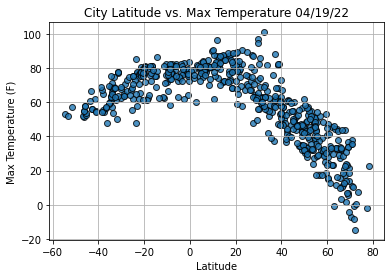

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

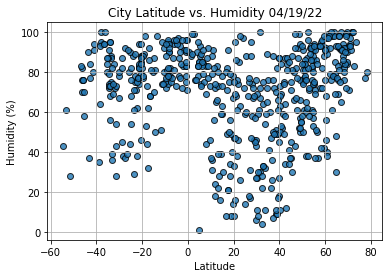

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

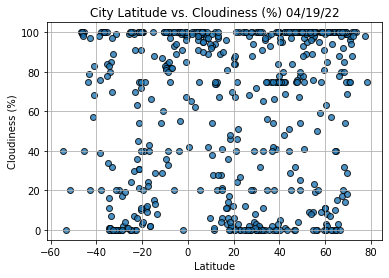

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

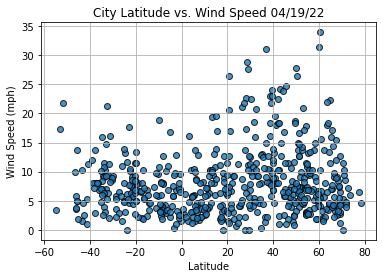

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()